## ¿ Que longitudes de onda son importantes para determinar si una planta de banano está enferma, con estres hidrico o está sana ?

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import dataFunction4 as datF
from sklearn.model_selection import train_test_split

In [2]:
file = 'newdatos.csv'
path_ = r"C:\Users\Acer\Documents\python\Espectro Plantas Banano\Nuevos Datos\Procesaminto nuevos datos"
path_.replace('\\', '/')
file = os.path.join(path_, file)

df = pd.read_csv(file, sep=';')

In [3]:
df

,dpi,Sana,Tratamiento,350,351,352,353,354,355,356,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0,1,Control,0.061030,0.060394,0.053344,0.054736,0.057163,0.055928,0.049880,...,0.044963,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752
1,0,1,Control,0.060823,0.060909,0.056016,0.056755,0.057975,0.056499,0.051715,...,0.037656,0.037458,0.037266,0.037120,0.036929,0.036832,0.036861,0.036779,0.036661,0.036570
2,0,1,Control,0.059742,0.060113,0.057320,0.059280,0.059741,0.057078,0.053557,...,0.036252,0.036049,0.035732,0.035558,0.035431,0.035338,0.035368,0.035286,0.035157,0.035058
3,0,1,Control,0.048861,0.047099,0.044486,0.049340,0.052701,0.050598,0.044007,...,0.033894,0.033762,0.033693,0.033536,0.033412,0.033204,0.032831,0.032637,0.032501,0.032376
4,0,1,Control,0.063155,0.060788,0.057388,0.058424,0.060128,0.059009,0.053017,...,0.033897,0.033729,0.033675,0.033571,0.033515,0.033441,0.033317,0.033257,0.033285,0.033205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,15,0,Fus_EH_Ral,0.043432,0.040299,0.044928,0.043590,0.043106,0.043309,0.039035,...,0.457833,0.457364,0.456816,0.456330,0.455801,0.455405,0.455075,0.454813,0.454657,0.454506
3533,15,0,Fus_EH_Ral,0.060325,0.058118,0.063626,0.059556,0.056792,0.055577,0.048689,...,0.031415,0.031205,0.031081,0.030896,0.030624,0.030500,0.030449,0.030357,0.030360,0.030226
3534,15,0,Fus_EH_Ral,0.062275,0.062429,0.065365,0.062081,0.061105,0.061609,0.056559,...,0.467972,0.467545,0.467278,0.466877,0.466423,0.466098,0.465760,0.465483,0.465317,0.465222
3535,15,0,Fus_EH_Ral,0.062731,0.059813,0.065723,0.062644,0.058222,0.055873,0.054696,...,0.038095,0.037925,0.037779,0.037653,0.037614,0.037422,0.037161,0.036949,0.036626,0.036474


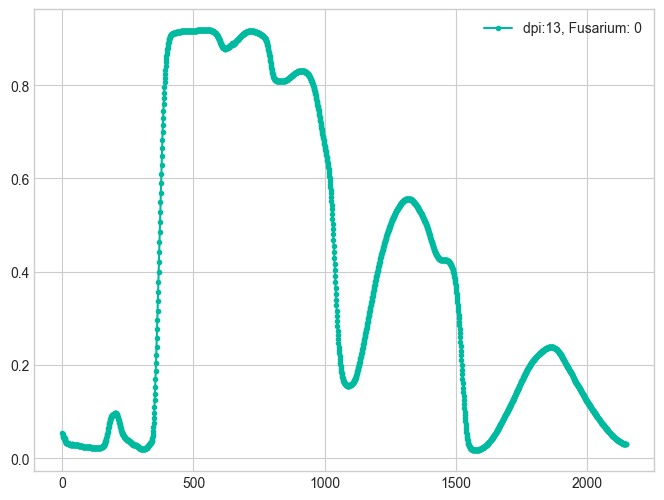

In [4]:
datF.ver_planta(df, idx=3000)

In [3]:
file = 'LogisticRL1_model.pkl'
path_ = r"C:\Users\Acer\Documents\python\Espectro Plantas Banano\Proyecto de investigacion ver2\ModelSelection4"
path_.replace('\\', '/')
file = os.path.join(path_, file)

with open(file, 'rb') as f:
    feature_selection_model = pickle.load(f)

`best_params` son los parametros con los que entrené a  `feature_selection_model` usando el estimador `LogisticRegression` de sklearn

In [6]:
best_params = {'C': 10000, 'class_weight': None, 'max_iter': 10000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear', 'multi_class': 'auto'}


accuracy: 0.924

Confusion_Matrix:
[[ 293  129   26]
 [  35 2385   32]
 [  18   29  590]]


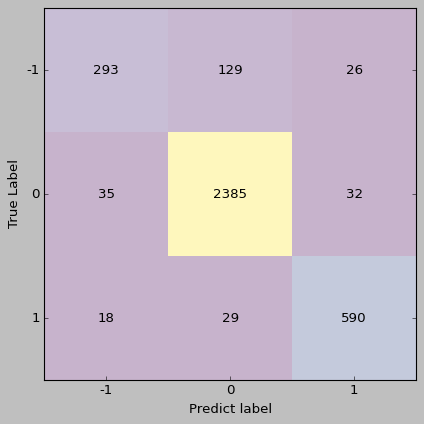

In [7]:
datF.model_confmat(feature_selection_model, df.iloc[:, 3:].values, df['Sana'].values)

Nota, no hice kfold crossvalitation dado que era muy costoso computacionalmente y además en modelos similares que entrené kfold crossvalidation tuvo un scrore y una varianza muy positiva

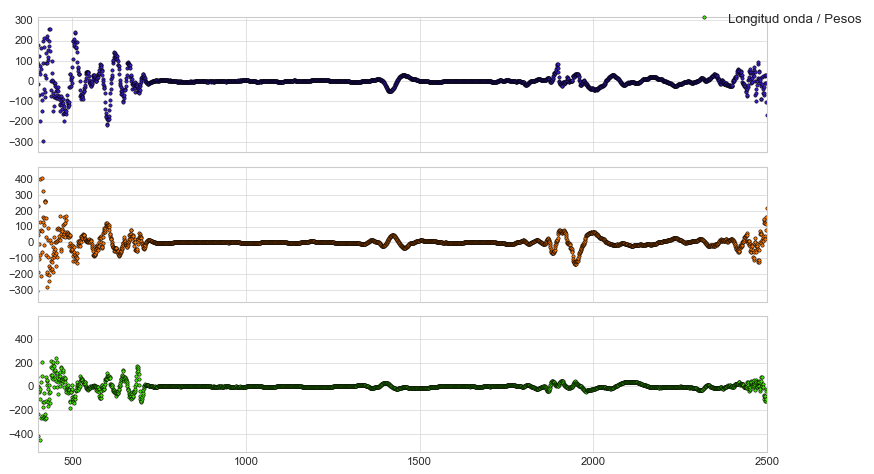

In [8]:
datF.plot_coefs_2(feature_selection_model.coef_, df.columns[3:].astype(int))

In [4]:
df_coef = pd.DataFrame(feature_selection_model.coef_.T, index=df.columns[3:].astype(int), columns=[-1, 0, 1])
df_coef.index.name = "Longitud onda"
df_coef

,-1,0,1
Longitud onda,,,
350,91.015554,3.243022,-62.208852
351,84.069204,-77.785706,-39.471182
352,-39.408826,17.162564,5.222860
353,-55.131376,-24.866956,124.881412
354,-14.723491,-50.553685,115.432117
...,...,...,...
2496,29.208518,21.491626,-80.103368
2497,29.460129,76.569559,-120.269287
2498,-8.891992,118.205034,-105.808452


In [5]:
df_coef = (df_coef.abs() >= 50)
df_coef['op'] = (df_coef[-1] & df_coef[0] & df_coef[1])
df_coef

,-1,0,1,op
Longitud onda,,,,
350,True,False,True,False
351,True,True,False,False
352,False,False,False,False
353,True,False,True,False
354,False,True,True,False
...,...,...,...,...
2496,False,False,True,False
2497,False,True,True,False
2498,False,True,True,False


In [6]:
df_coef = df_coef[(df_coef['op'] == True)]
df_coef

,-1,0,1,op
Longitud onda,,,,
356,True,True,True,True
371,True,True,True,True
373,True,True,True,True
374,True,True,True,True
385,True,True,True,True
...,...,...,...,...
629,True,True,True,True
630,True,True,True,True
631,True,True,True,True


In [7]:
df = df[['dpi', 'Sana', 'Tratamiento'] + df_coef.index.astype(str).to_list()]
df

,dpi,Sana,Tratamiento,356,371,373,374,385,386,387,...,604,605,606,607,628,629,630,631,2491,2492
0,0,1,Control,0.049880,0.036617,0.037033,0.036325,0.035360,0.034508,0.034924,...,0.052944,0.052632,0.052292,0.051961,0.046232,0.046173,0.046107,0.046031,0.044963,0.044834
1,0,1,Control,0.051715,0.037969,0.040762,0.039857,0.037929,0.036618,0.036317,...,0.040996,0.040752,0.040452,0.040199,0.035891,0.035856,0.035799,0.035721,0.037656,0.037458
2,0,1,Control,0.053557,0.042114,0.043219,0.042527,0.041611,0.040358,0.040157,...,0.041155,0.040879,0.040586,0.040323,0.035729,0.035672,0.035598,0.035500,0.036252,0.036049
3,0,1,Control,0.044007,0.030428,0.032633,0.032369,0.029326,0.028537,0.028686,...,0.036702,0.036397,0.036077,0.035791,0.030785,0.030748,0.030677,0.030608,0.033894,0.033762
4,0,1,Control,0.053017,0.042288,0.045402,0.043786,0.044107,0.042572,0.041948,...,0.045216,0.044903,0.044588,0.044285,0.039247,0.039197,0.039126,0.039053,0.033897,0.033729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,15,0,Fus_EH_Ral,0.039035,0.036504,0.039486,0.036594,0.037591,0.037037,0.037650,...,0.081579,0.082103,0.082707,0.083276,0.095615,0.096226,0.096862,0.097533,0.457833,0.457364
3533,15,0,Fus_EH_Ral,0.048689,0.046786,0.049546,0.048591,0.047628,0.047585,0.048023,...,0.052275,0.051922,0.051566,0.051174,0.044713,0.044605,0.044507,0.044451,0.031415,0.031205
3534,15,0,Fus_EH_Ral,0.056559,0.056776,0.057553,0.057435,0.058502,0.059350,0.060095,...,0.115511,0.116051,0.116650,0.117226,0.129636,0.130264,0.130900,0.131535,0.467972,0.467545
3535,15,0,Fus_EH_Ral,0.054696,0.046736,0.047510,0.046545,0.045402,0.045597,0.046289,...,0.053369,0.053103,0.052830,0.052495,0.047321,0.047244,0.047167,0.047073,0.038095,0.037925


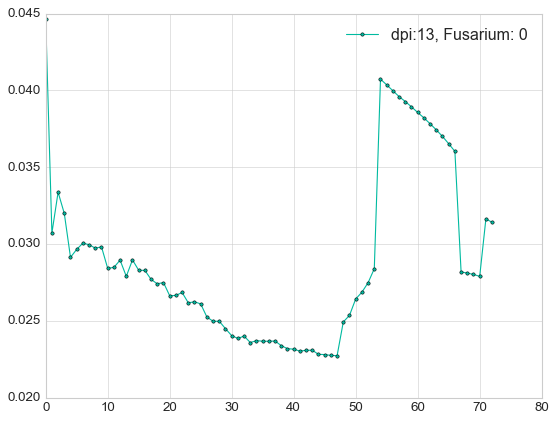

In [13]:
datF.ver_planta(df, idx=3000)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 3:].values,
    df['Sana'].values,
    test_size=0.2,
    random_state=71
)
print(f'número de muestras en train: {y_train.shape[0]}')
print(f'número de muestras en test: {y_test.shape[0]}')

número de muestras en train: 2829
número de muestras en test: 708


In [9]:
from sklearn.ensemble import RandomForestClassifier
best_parms = {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 2000, 'n_jobs': -1}
clf_ = RandomForestClassifier(**best_parms)
datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

fold 1 accuracy 0.788
fold 2 accuracy 0.782
fold 3 accuracy 0.780
fold 4 accuracy 0.817
fold 5 accuracy 0.824
fold 6 accuracy 0.819
fold 7 accuracy 0.817

CV accuracy: 0.804 +/- 0.018


score en train: 1.000


accuracy: 0.794

Confusion_Matrix:
[[ 22  50  16]
 [  9 463  21]
 [  1  49  77]]


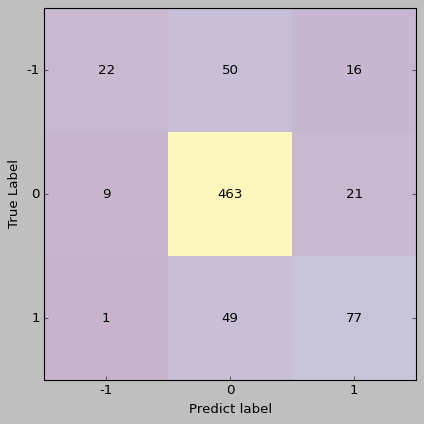

In [10]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)


In [15]:
from sklearn.svm import SVC
best_parms = {'C': 100000, 'class_weight': None, 'decision_function_shape': 'ovr', 'kernel': 'linear'}
clf_ = SVC(**best_parms)
datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

fold 1 accuracy 0.793
fold 2 accuracy 0.785
fold 3 accuracy 0.802
fold 4 accuracy 0.827
fold 5 accuracy 0.812
fold 6 accuracy 0.822
fold 7 accuracy 0.780

CV accuracy: 0.803 +/- 0.017


score en train: 0.820


accuracy: 0.790

Confusion_Matrix:
[[ 21  52  15]
 [ 12 448  33]
 [  8  29  90]]


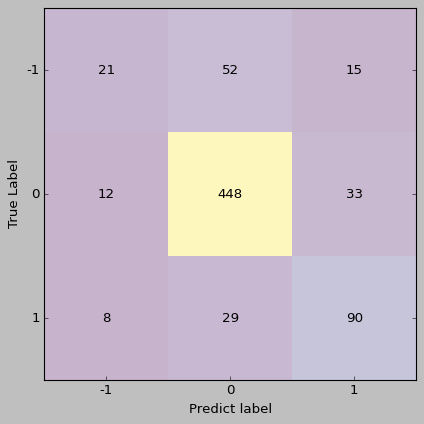

In [16]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)

In [17]:
from sklearn.svm import SVC
class_weights = {-1: 1 / 0.13, 0: 1 / 0.69, 1: 1 / 0.18}
best_parms = {'C': 100000, 'class_weight': class_weights, 'decision_function_shape': 'ovr', 'kernel': 'linear'}
clf_ = SVC(**best_parms)
datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

fold 1 accuracy 0.726
fold 2 accuracy 0.750
fold 3 accuracy 0.733
fold 4 accuracy 0.750
fold 5 accuracy 0.762
fold 6 accuracy 0.800
fold 7 accuracy 0.755

CV accuracy: 0.754 +/- 0.022


score en train: 0.776


accuracy: 0.720

Confusion_Matrix:
[[ 58  13  17]
 [ 78 345  70]
 [ 15   5 107]]


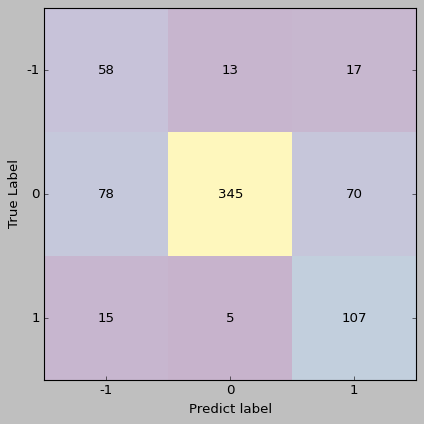

In [18]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
best_parms = {'loss':'log_loss', 'learning_rate':0.01, 'n_estimators': 1000, 'max_depth': 5}
clf_ = GradientBoostingClassifier(**best_parms)
# datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

score en train: 0.990


accuracy: 0.781

Confusion_Matrix:
[[ 26  44  18]
 [ 19 452  22]
 [ 11  41  75]]


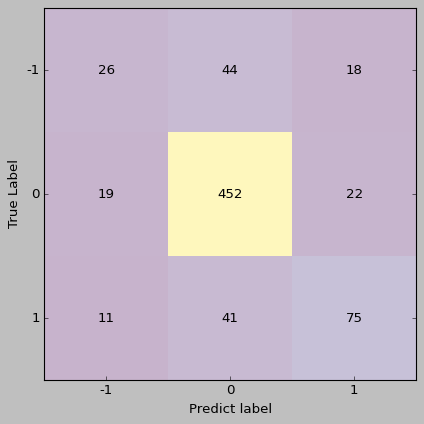

In [ ]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)
# Tiempo de ejecucion 7 min 14 seg

In [9]:
df['Sana'] = df['Sana'].values + 1
df['Sana'].unique()

array([2, 1, 0], dtype=int64)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 3:].values,
    df['Sana'].values,
    test_size=0.2,
    random_state=71
)

In [10]:
from torch.utils.data import DataLoader
from dataFunction4 import BananosEspectroDataset, validate, plot_learning_curve, PruebaModel
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.nn.functional import softmax
from torch import tensor, float32

In [13]:
trainDataset = BananosEspectroDataset(inputs=X_train, labels=y_train)
testDataset = BananosEspectroDataset(inputs=X_test, labels=y_test)

batch_size = 200
train_dl = DataLoader(dataset=trainDataset, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(dataset=testDataset, batch_size=batch_size, shuffle=False)


#NNmodel = EspectroModel()
NNmodel = PruebaModel()
loss_fn = CrossEntropyLoss()
optimizer = Adam(NNmodel.parameters(), lr=0.001)

loss_hist_train = []
accuracy_hist_train = []
loss_hist_test = []
accuracy_hist_test = []

num_epoch = 1000
for epoch in range(num_epoch):
    NNmodel.train()
    epoch_losses_train = []
    epoch_accuracy_train = []

    for batch_inputs, batch_labels in train_dl:
        """
        batch_inputs es de tamaño toch.size([batch_size, 1, n_features])
        batch_labels es de tamaño toch.size([batch_size])
        """
        #(NO CONV1d) [:, 0, :]  NNmodel(batch_inputs) -> toch.size([batch_size, 1, n_classes])    NNmodel(batch_inputs)[:, 0, :] -> torch.Size([batch_size, n_classes])
        pred = NNmodel(batch_inputs)  # Aquí pred tiene shape torch.Size([batch_size, n_classes])
        loss = loss_fn(pred, batch_labels.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_losses_train.append(loss.item())

        pred = softmax(pred, dim=1) # en cada fila del tensor (batch_size) normaliza cada columna (n_classes) de tal forma que la suma de 1
        accuracy = (pred.max(1, keepdim=True)[1][:, 0] == batch_labels).float()
        accuracy = accuracy.mean().item()
        epoch_accuracy_train.append(accuracy)
        
        batch_inputs, batch_labels, pred = None, None, None

    loss_hist_train.append(np.mean(epoch_losses_train))
    accuracy_hist_train.append(np.mean(epoch_accuracy_train))
    epoch_losses_test, epoch_accuracy_test = validate(test_dl, NNmodel, loss_fn)
    loss_hist_test.append(epoch_losses_test)
    accuracy_hist_test.append(epoch_accuracy_test)

    print(
        f'Epoch {epoch+1} / {num_epoch}  Training Loss: {np.mean(epoch_losses_train):.4f}, Training Accuracy: {np.mean(epoch_accuracy_train)*100:.2f}%, Test Loss: {epoch_losses_test:.4f}, Test Accuracy: {epoch_accuracy_test*100:.2f}%'
    )

Epoch 1 / 1000  Training Loss: 1.3308, Training Accuracy: 18.57%, Test Loss: 1.3005, Test Accuracy: 18.00%
Epoch 2 / 1000  Training Loss: 1.2712, Training Accuracy: 18.57%, Test Loss: 1.2400, Test Accuracy: 18.00%
Epoch 3 / 1000  Training Loss: 1.2199, Training Accuracy: 18.57%, Test Loss: 1.1953, Test Accuracy: 18.00%
Epoch 4 / 1000  Training Loss: 1.1683, Training Accuracy: 18.57%, Test Loss: 1.1365, Test Accuracy: 18.00%
Epoch 5 / 1000  Training Loss: 1.1077, Training Accuracy: 31.76%, Test Loss: 1.0767, Test Accuracy: 69.40%
Epoch 6 / 1000  Training Loss: 1.0536, Training Accuracy: 69.23%, Test Loss: 1.0294, Test Accuracy: 69.40%
Epoch 7 / 1000  Training Loss: 1.0124, Training Accuracy: 69.23%, Test Loss: 0.9941, Test Accuracy: 69.40%
Epoch 8 / 1000  Training Loss: 0.9817, Training Accuracy: 69.23%, Test Loss: 0.9675, Test Accuracy: 69.40%
Epoch 9 / 1000  Training Loss: 0.9580, Training Accuracy: 69.23%, Test Loss: 0.9463, Test Accuracy: 69.40%
Epoch 10 / 1000  Training Loss: 0.938

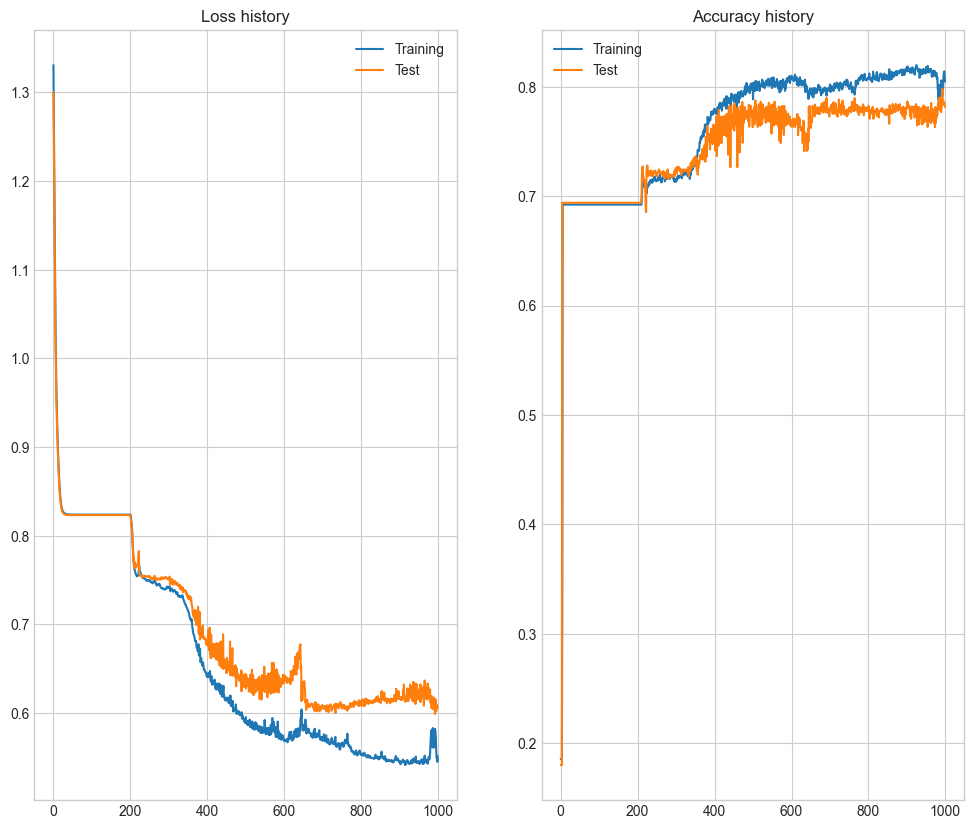

In [ ]:
plot_learning_curve(loss_hist_train, accuracy_hist_train, loss_hist_test, accuracy_hist_test)


In [15]:
y_pred = tensor(X_test, dtype=float32)
y_pred = y_pred.unsqueeze(1)
y_pred = NNmodel(y_pred)
y_pred = softmax(y_pred, dim=1).max(1, keepdim=True)[1][:, 0]
y_pred = y_pred.numpy()

accuracy: 78.81


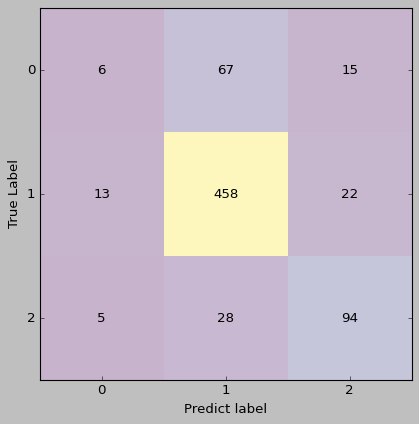

In [16]:
datF.model_confmat_2(y_pred=y_pred, y_test=y_test)

## AAAAAAA

In [4]:
df_coef = pd.DataFrame(feature_selection_model.coef_.T, index=df.columns[3:].astype(int), columns=[-1, 0, 1])
df_coef.index.name = "Longitud onda"
df_coef = (df_coef.abs() >= 50)
df_coef['op'] = (df_coef[-1] | df_coef[0] | df_coef[1])
df_coef = df_coef[(df_coef['op'] == True)]
df_coef

,-1,0,1,op
Longitud onda,,,,
350,True,False,True,True
351,True,True,False,True
353,True,False,True,True
354,False,True,True,True
355,False,True,False,True
...,...,...,...,...
2496,False,False,True,True
2497,False,True,True,True
2498,False,True,True,True


In [5]:
df = df[['dpi', 'Sana', 'Tratamiento'] + df_coef.index.astype(str).to_list()]
df

,dpi,Sana,Tratamiento,350,351,353,354,355,356,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0,1,Control,0.061030,0.060394,0.054736,0.057163,0.055928,0.049880,0.044614,...,0.044963,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752
1,0,1,Control,0.060823,0.060909,0.056755,0.057975,0.056499,0.051715,0.046623,...,0.037656,0.037458,0.037266,0.037120,0.036929,0.036832,0.036861,0.036779,0.036661,0.036570
2,0,1,Control,0.059742,0.060113,0.059280,0.059741,0.057078,0.053557,0.048903,...,0.036252,0.036049,0.035732,0.035558,0.035431,0.035338,0.035368,0.035286,0.035157,0.035058
3,0,1,Control,0.048861,0.047099,0.049340,0.052701,0.050598,0.044007,0.038123,...,0.033894,0.033762,0.033693,0.033536,0.033412,0.033204,0.032831,0.032637,0.032501,0.032376
4,0,1,Control,0.063155,0.060788,0.058424,0.060128,0.059009,0.053017,0.048053,...,0.033897,0.033729,0.033675,0.033571,0.033515,0.033441,0.033317,0.033257,0.033285,0.033205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,15,0,Fus_EH_Ral,0.043432,0.040299,0.043590,0.043106,0.043309,0.039035,0.044996,...,0.457833,0.457364,0.456816,0.456330,0.455801,0.455405,0.455075,0.454813,0.454657,0.454506
3533,15,0,Fus_EH_Ral,0.060325,0.058118,0.059556,0.056792,0.055577,0.048689,0.055316,...,0.031415,0.031205,0.031081,0.030896,0.030624,0.030500,0.030449,0.030357,0.030360,0.030226
3534,15,0,Fus_EH_Ral,0.062275,0.062429,0.062081,0.061105,0.061609,0.056559,0.063542,...,0.467972,0.467545,0.467278,0.466877,0.466423,0.466098,0.465760,0.465483,0.465317,0.465222
3535,15,0,Fus_EH_Ral,0.062731,0.059813,0.062644,0.058222,0.055873,0.054696,0.055217,...,0.038095,0.037925,0.037779,0.037653,0.037614,0.037422,0.037161,0.036949,0.036626,0.036474


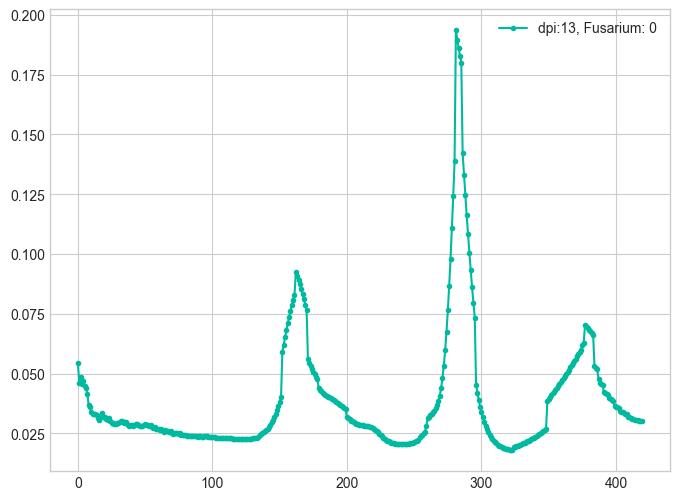

In [6]:
datF.ver_planta(df, idx=3000)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 3:].values,
    df['Sana'].values,
    test_size=0.2,
    random_state=71
)
print(f'número de muestras en train: {y_train.shape[0]}')
print(f'número de muestras en test: {y_test.shape[0]}')

número de muestras en train: 2829
número de muestras en test: 708


In [8]:
from sklearn.ensemble import RandomForestClassifier
best_parms = {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 2000, 'n_jobs': -1}
clf_ = RandomForestClassifier(**best_parms)
datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

fold 1 accuracy 0.812
fold 2 accuracy 0.839
fold 3 accuracy 0.829
fold 4 accuracy 0.856
fold 5 accuracy 0.859
fold 6 accuracy 0.839
fold 7 accuracy 0.829

CV accuracy: 0.838 +/- 0.015


score en train: 1.000


accuracy: 0.828

Confusion_Matrix:
[[ 31  42  15]
 [  6 466  21]
 [  4  34  89]]


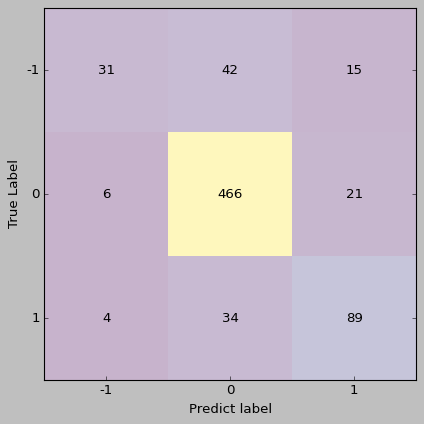

In [9]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)

In [10]:
from sklearn.svm import SVC
best_parms = {'C': 100000, 'class_weight': None, 'decision_function_shape': 'ovr', 'kernel': 'linear'}
clf_ = SVC(**best_parms)
datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

fold 1 accuracy 0.874
fold 2 accuracy 0.879
fold 3 accuracy 0.871
fold 4 accuracy 0.894
fold 5 accuracy 0.889
fold 6 accuracy 0.884
fold 7 accuracy 0.881

CV accuracy: 0.882 +/- 0.007


score en train: 0.917


accuracy: 0.856

Confusion_Matrix:
[[ 49  30   9]
 [ 27 446  20]
 [  8   8 111]]


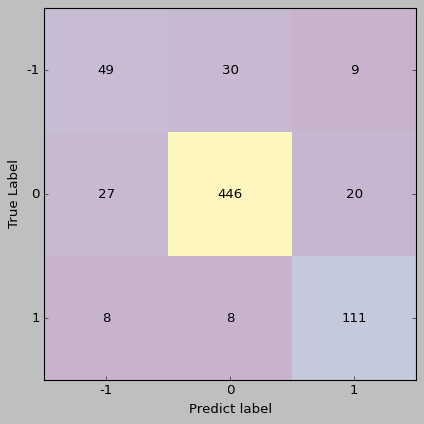

In [11]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)

In [12]:
from sklearn.svm import SVC
class_weights = {-1: 1 / 0.13, 0: 1 / 0.69, 1: 1 / 0.18}
best_parms = {'C': 100000, 'class_weight': class_weights, 'decision_function_shape': 'ovr', 'kernel': 'linear'}
clf_ = SVC(**best_parms)
datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

fold 1 accuracy 0.849
fold 2 accuracy 0.859
fold 3 accuracy 0.827
fold 4 accuracy 0.884
fold 5 accuracy 0.861
fold 6 accuracy 0.871
fold 7 accuracy 0.864

CV accuracy: 0.859 +/- 0.017


score en train: 0.911


accuracy: 0.836

Confusion_Matrix:
[[ 75   4   9]
 [ 55 403  35]
 [ 10   3 114]]


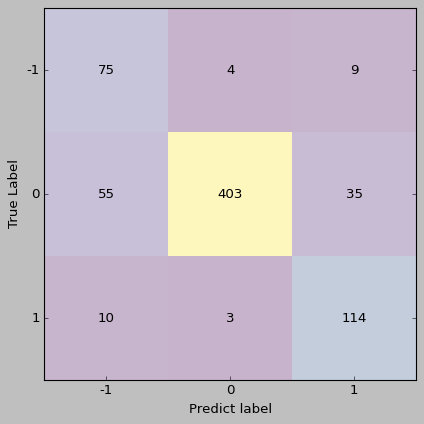

In [14]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
best_parms = {'loss':'log_loss', 'learning_rate':0.01, 'n_estimators': 1000, 'max_depth': 5}
clf_ = GradientBoostingClassifier(**best_parms)
# datF.kfoldCV_clf(clf_, X_train, y_train, n_splits=7)

In [ ]:
clf_.fit(X_train, y_train)
score = clf_.score(X_train, y_train)
print(f'score en train: {score:.3f}\n')
datF.model_confmat(clf_, X_test, y_test)
# Tiempo de ejecucion 

In [6]:
df['Sana'] = df['Sana'].values + 1
df['Sana'].unique()

array([2, 1, 0], dtype=int64)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 3:].values,
    df['Sana'].values,
    test_size=0.2,
    random_state=71
)

In [10]:
from torch.utils.data import DataLoader
from dataFunction4 import BananosEspectroDataset, validate, plot_learning_curve, PruebaModel2
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.nn.functional import softmax
from torch import tensor, float32

In [11]:
trainDataset = BananosEspectroDataset(inputs=X_train, labels=y_train)
testDataset = BananosEspectroDataset(inputs=X_test, labels=y_test)

batch_size = 200
train_dl = DataLoader(dataset=trainDataset, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(dataset=testDataset, batch_size=batch_size, shuffle=False)


#NNmodel = EspectroModel()
NNmodel = PruebaModel2()
loss_fn = CrossEntropyLoss()
optimizer = Adam(NNmodel.parameters(), lr=0.001)

loss_hist_train = []
accuracy_hist_train = []
loss_hist_test = []
accuracy_hist_test = []

num_epoch = 1000
for epoch in range(num_epoch):
    NNmodel.train()
    epoch_losses_train = []
    epoch_accuracy_train = []

    for batch_inputs, batch_labels in train_dl:
        """
        batch_inputs es de tamaño toch.size([batch_size, 1, n_features])
        batch_labels es de tamaño toch.size([batch_size])
        """
        #(NO CONV1d) [:, 0, :]  NNmodel(batch_inputs) -> toch.size([batch_size, 1, n_classes])    NNmodel(batch_inputs)[:, 0, :] -> torch.Size([batch_size, n_classes])
        pred = NNmodel(batch_inputs)  # Aquí pred tiene shape torch.Size([batch_size, n_classes])
        loss = loss_fn(pred, batch_labels.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_losses_train.append(loss.item())

        pred = softmax(pred, dim=1) # en cada fila del tensor (batch_size) normaliza cada columna (n_classes) de tal forma que la suma de 1
        accuracy = (pred.max(1, keepdim=True)[1][:, 0] == batch_labels).float()
        accuracy = accuracy.mean().item()
        epoch_accuracy_train.append(accuracy)
        
        batch_inputs, batch_labels, pred = None, None, None

    loss_hist_train.append(np.mean(epoch_losses_train))
    accuracy_hist_train.append(np.mean(epoch_accuracy_train))
    epoch_losses_test, epoch_accuracy_test = validate(test_dl, NNmodel, loss_fn)
    loss_hist_test.append(epoch_losses_test)
    accuracy_hist_test.append(epoch_accuracy_test)

    print(
        f'Epoch {epoch+1} / {num_epoch}  Training Loss: {np.mean(epoch_losses_train):.4f}, Training Accuracy: {np.mean(epoch_accuracy_train)*100:.2f}%, Test Loss: {epoch_losses_test:.4f}, Test Accuracy: {epoch_accuracy_test*100:.2f}%'
    )

Epoch 1 / 1000  Training Loss: 1.0073, Training Accuracy: 69.23%, Test Loss: 0.9755, Test Accuracy: 69.40%
Epoch 2 / 1000  Training Loss: 0.9596, Training Accuracy: 69.23%, Test Loss: 0.9429, Test Accuracy: 69.40%
Epoch 3 / 1000  Training Loss: 0.9358, Training Accuracy: 69.23%, Test Loss: 0.9254, Test Accuracy: 69.40%
Epoch 4 / 1000  Training Loss: 0.9204, Training Accuracy: 69.23%, Test Loss: 0.9120, Test Accuracy: 69.40%
Epoch 5 / 1000  Training Loss: 0.9081, Training Accuracy: 69.23%, Test Loss: 0.9007, Test Accuracy: 69.40%
Epoch 6 / 1000  Training Loss: 0.8974, Training Accuracy: 69.23%, Test Loss: 0.8905, Test Accuracy: 69.40%
Epoch 7 / 1000  Training Loss: 0.8876, Training Accuracy: 69.23%, Test Loss: 0.8812, Test Accuracy: 69.40%
Epoch 8 / 1000  Training Loss: 0.8786, Training Accuracy: 69.23%, Test Loss: 0.8723, Test Accuracy: 69.40%
Epoch 9 / 1000  Training Loss: 0.8701, Training Accuracy: 69.23%, Test Loss: 0.8643, Test Accuracy: 69.40%
Epoch 10 / 1000  Training Loss: 0.863

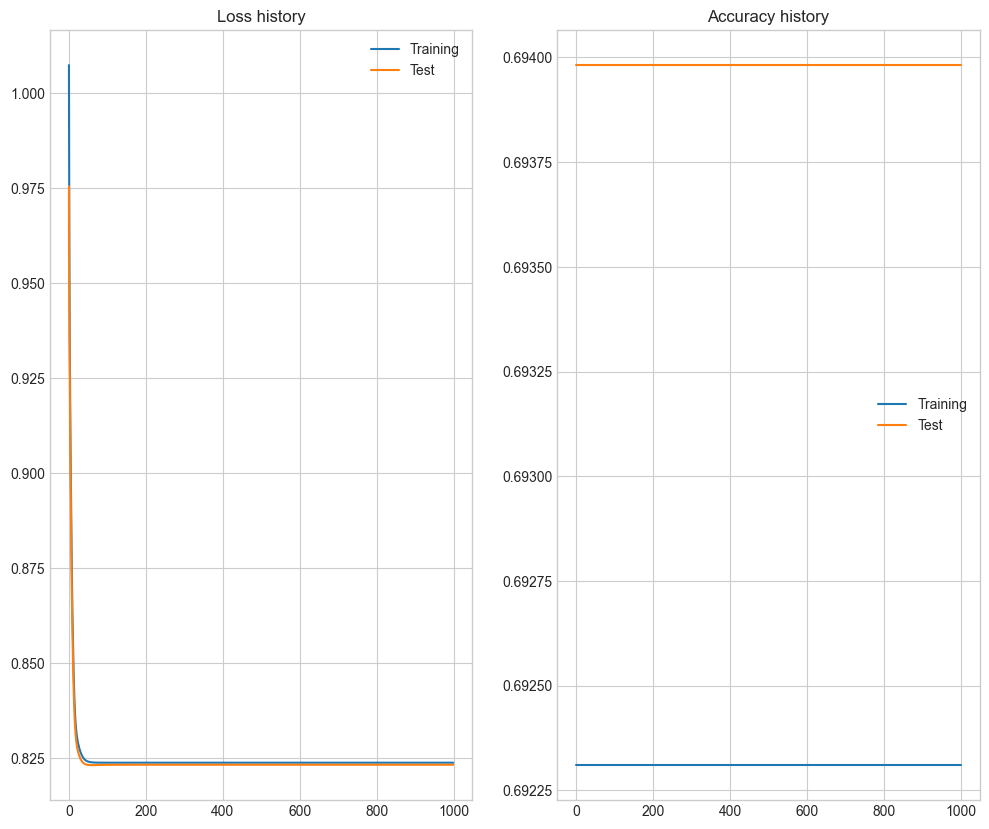

In [12]:
plot_learning_curve(loss_hist_train, accuracy_hist_train, loss_hist_test, accuracy_hist_test)


In [13]:
y_pred = tensor(X_test, dtype=float32)
y_pred = y_pred.unsqueeze(1)
y_pred = NNmodel(y_pred)
y_pred = softmax(y_pred, dim=1).max(1, keepdim=True)[1][:, 0]
y_pred = y_pred.numpy()

accuracy: 69.63


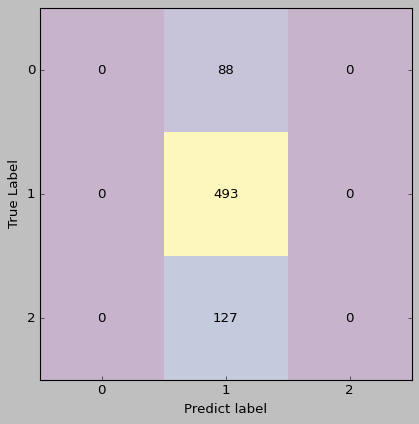

In [14]:
datF.model_confmat_2(y_pred=y_pred, y_test=y_test)